### Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data collection and processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("car_data.csv")

In [4]:
# inspecting the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of datapoints and features (rows & columns respectively)
car_dataset.shape

(301, 9)

In [6]:
# getting information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# check for the missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# check the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# ML model cannot understand text like "Petrol", "Manual"
# These categorical data needs to be encoded

car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
# seperating features and target
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1) #features
y = car_dataset['Selling_Price'] #target

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
# Split the data to training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

### Model Training - Linear Regression

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [22]:
#R-squared error on train data
train_data_prediction = model.predict(x_train)
train_error_score = metrics.r2_score(y_train, train_data_prediction)
print("R-squared error on train data: ",train_error_score)

R-squared error on train data:  0.8799451660493698


In [26]:
#R-squared error on test data
test_data_prediction = model.predict(x_test)
test_error_score = metrics.r2_score(y_test, test_data_prediction)
print("R-squared error on test data: ",test_error_score)

R-squared error on test data:  0.8365766715026905


### Visualize the actual price and the predicted price

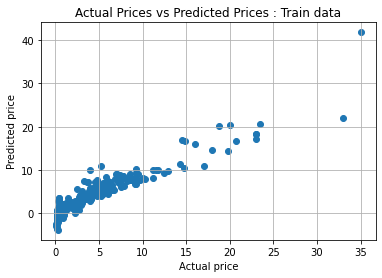

In [28]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices : Train data")
plt.grid()
plt.show()

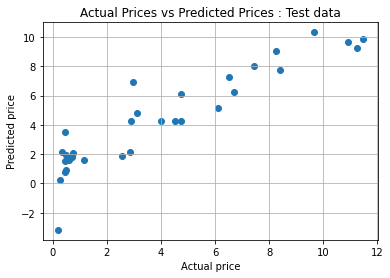

In [27]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices : Test data")
plt.grid()
plt.show()

### Model Training - Lasso

In [31]:
lasso_model = Lasso()

In [32]:
lasso_model.fit(x_train, y_train)

Lasso()

### Model Evaluation

In [39]:
#R-squared error on train data
lasso_train_data_prediction = lasso_model.predict(x_train)
lasso_train_error_score = metrics.r2_score(y_train, lasso_train_data_prediction)
print("R-squared error on train data: ",lasso_train_error_score)

R-squared error on train data:  0.8427856123435794


In [40]:
#R-squared error on test data
lasso_test_data_prediction = lasso_model.predict(x_test)
lasso_test_error_score = metrics.r2_score(y_test, lasso_test_data_prediction)
print("R-squared error on test data: ",lasso_test_error_score)

R-squared error on test data:  0.8709167941173195


### Visualize the actual price and the predicted price

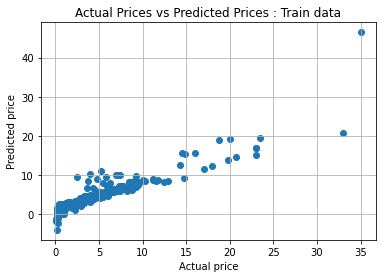

In [41]:
plt.scatter(y_train, lasso_train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices : Train data")
plt.grid()
plt.show()

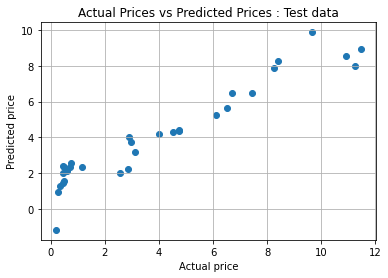

In [42]:
plt.scatter(y_test, lasso_test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices : Test data")
plt.grid()
plt.show()